<a href="https://colab.research.google.com/github/bcaffo/ds4bme_intro/blob/master/notebooks/regression_through_the_origin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression through the origin

In this notebook, we investigate a simple poblem where we'd like to use one scaled regressor to predict another. That is, let $Y_1, \ldots Y_n$ be a collection of variables we'd like to predict and $X_1, \ldots, X_n$ be predictors. Consider minimizing

$$
l = \sum_i ( Y_i - \beta X_i)^2 = || Y - \beta X||^2.
$$

Taking a derivative of $l$ with respect to $\beta$ yields 

$$
l' = - \sum_i 2 (Y_i - \beta X_i) X_i.
$$

If we set this equal to zero and solve for beta we obtain the classic solution:

$$
\hat \beta = \frac{\sum_i Y_i X_i}{\sum_i X_i^2} = \frac{<Y, X>}{||X||^2}.
$$

Note further, if we take a second derivative we get

$$
l'' = \sum_i 2 x_i^2  
$$

which is strictly positive unless all of the $x_i$ are zero (a case of zero variation in the predictor where regresssion is uninteresting). Regression through the origin is a very useful version of regression, but it's quite limited in its application. Rarely do we want to fit a line that is forced to go through the origin, or stated equivalently, rarely do we want a prediction algorithm for
$Y$ that is simply a scale change of $X$. Typically, we at least also want an intercept. In the example that follows, we'll address this by centering the data so that the origin is the mean of the $Y$ and the mean of the $X$. As it turns out, this is the same as fitting the intercept, but we'll do that more formally in the next section.

First let's load the necessary packages.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Now let's download and read in the data.

In [2]:
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")
dat.head()

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0
4,1.580589,1.730152,-0.860949,1.245609,0.617957,0.866352,-0.099919,0.384261,0.391133,0.608826,0.071648,0.340601,0


It's almost always a good idea to plot the data before fitting the model.

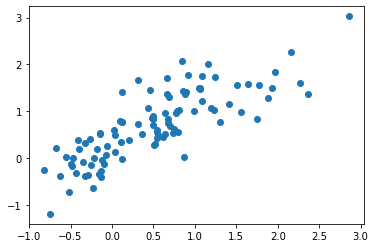

In [3]:
x = dat.T2
y = dat.PD
plt.plot(x, y, 'o')

Now, let's center the data as we mentioned so that it seems more reasonable to have the line go through the origin. Notice here, the middle of the data, both $Y$ and $X$, is right at (0, 0). 

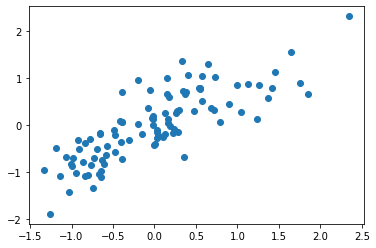

In [4]:
x = x - np.mean(x)
y = y - np.mean(y)
plt.plot(x, y, 'o')

Here's our slope estimate according to our formula.

In [5]:
b = sum(y * x) / sum(x ** 2 )
b

0.7831514763656

Let's plot it so to see how it did. It looks good. Now let's see if we can do a line that doesn't necessarily have to go through the origin.

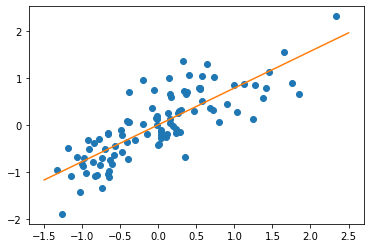

In [6]:
plt.plot(x, y, 'o')
t = np.array([-1.5, 2.5])
plt.plot(t, t * b)